<a href="https://colab.research.google.com/github/AaryaDesai1/Saliency_Maps/blob/main/Saliency_Maps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

>[Introduction](#updateTitle=true&folderId=1x36IERwUJKrneEXL5cf-qzCS5IjSGk3Q&scrollTo=c6Mk8HpKa9Aw)

>>[What are Saliency Maps?](#updateTitle=true&folderId=1x36IERwUJKrneEXL5cf-qzCS5IjSGk3Q&scrollTo=c6Mk8HpKa9Aw)

>>[How Saliecy maps work:](#updateTitle=true&folderId=1x36IERwUJKrneEXL5cf-qzCS5IjSGk3Q&scrollTo=c6Mk8HpKa9Aw)

>>[How to interpret the saliency map:](#updateTitle=true&folderId=1x36IERwUJKrneEXL5cf-qzCS5IjSGk3Q&scrollTo=c6Mk8HpKa9Aw)

>[Hypotheses](#updateTitle=true&folderId=1x36IERwUJKrneEXL5cf-qzCS5IjSGk3Q&scrollTo=-QmQKJJu3J3H)

>>[Null Hypothesis (H₀):](#updateTitle=true&folderId=1x36IERwUJKrneEXL5cf-qzCS5IjSGk3Q&scrollTo=-QmQKJJu3J3H)

>>[Alternative Hypothesis (H₁):](#updateTitle=true&folderId=1x36IERwUJKrneEXL5cf-qzCS5IjSGk3Q&scrollTo=-QmQKJJu3J3H)

>[Setting up the Notebook](#updateTitle=true&folderId=1x36IERwUJKrneEXL5cf-qzCS5IjSGk3Q&scrollTo=psJHNQ2LfMDo)

>>[Installing and Importing libraries](#updateTitle=true&folderId=1x36IERwUJKrneEXL5cf-qzCS5IjSGk3Q&scrollTo=psJHNQ2LfMDo)

>>[GPU Set-Up and Modelling](#updateTitle=true&folderId=1x36IERwUJKrneEXL5cf-qzCS5IjSGk3Q&scrollTo=B-N0PZvJfxjX)

>>>[Checking for GPU Availability](#updateTitle=true&folderId=1x36IERwUJKrneEXL5cf-qzCS5IjSGk3Q&scrollTo=B-N0PZvJfxjX)

>>>[Loading the CIFAR-10 Dataset](#updateTitle=true&folderId=1x36IERwUJKrneEXL5cf-qzCS5IjSGk3Q&scrollTo=B-N0PZvJfxjX)

>>>[Loading a Pre-trained ResNet-18 Model](#updateTitle=true&folderId=1x36IERwUJKrneEXL5cf-qzCS5IjSGk3Q&scrollTo=B-N0PZvJfxjX)

>[Saliency Mapping](#updateTitle=true&folderId=1x36IERwUJKrneEXL5cf-qzCS5IjSGk3Q&scrollTo=EGzQqbJ3gbxi)

>>[Defining Boundary & Internal Mask](#updateTitle=true&folderId=1x36IERwUJKrneEXL5cf-qzCS5IjSGk3Q&scrollTo=zJwp-S67ggKM)

>[Statistical Hypothesis Testing](#updateTitle=true&folderId=1x36IERwUJKrneEXL5cf-qzCS5IjSGk3Q&scrollTo=jZFxZ0sTgmgY)

>[Results](#updateTitle=true&folderId=1x36IERwUJKrneEXL5cf-qzCS5IjSGk3Q&scrollTo=D6kqSDiFgrhF)

>[Interpretation of Results:](#updateTitle=true&folderId=1x36IERwUJKrneEXL5cf-qzCS5IjSGk3Q&scrollTo=TUfy7IZjolfL)

>>[Statistical Results](#updateTitle=true&folderId=1x36IERwUJKrneEXL5cf-qzCS5IjSGk3Q&scrollTo=TUfy7IZjolfL)

>>[Image results:](#updateTitle=true&folderId=1x36IERwUJKrneEXL5cf-qzCS5IjSGk3Q&scrollTo=TUfy7IZjolfL)

>>[Conclusion:](#updateTitle=true&folderId=1x36IERwUJKrneEXL5cf-qzCS5IjSGk3Q&scrollTo=TUfy7IZjolfL)



### **Note** ChatGPT and Co-Pilot were used to write the code and interpret the results.

# Introduction

This assignment focuses on hypothesis testing, specifically in deep learning. For the same, I chose to look into how convolutional neural networks (CNNs) process and identify features in image classification tasks using saliency maps. The hypotheses are put forth as follows:

## What are Saliency Maps?
A saliency map is a visualization technique that highlights the most important pixels in an image that contribute to a model's prediction. It typically shows which areas of the image have the greatest influence on the output, often by computing the gradient of the output with respect to the input pixels.

## How Saliecy maps work:
1. Saliency maps are used to visualize the importance of each input feature to the model's prediction.
2. The saliency map is generated by computing the gradient of the model's output with respect to the input features.
3. The gradient values indicate how much the model's output would change if the input features were changed slightly.
4. The saliency map highlights the input features that have the most impact on the model's prediction.
5. Saliency maps are useful for interpreting and understanding the model's decision-making process.

## How to interpret the saliency map:
1. Bright regions in the saliency map indicate input features that are important for the model's prediction.
2. Dark regions in the saliency map indicate input features that are less important for the model's prediction.
3. The saliency map can help identify which input features the model is focusing on when making a prediction.
4. By analyzing the saliency map, we can gain insights into the model's decision-making process and understand how it is using the input features to make predictions.
5. Saliency maps can help identify potential biases or errors in the model's predictions by highlighting the input features that are driving the model's decisions.


# Hypotheses

## Null Hypothesis (H₀):
There is no significant (p > .05) difference in the importance of pixels around an object’s boundaries compared to pixels within the object for classifying images of animals in the ResNet model.

## Alternative Hypothesis (H₁):
There is a significant difference (p < .05) in the importance of pixels around an object’s boundaries compared to pixels within the object for classifying images of animals in the ResNet model. Specifically, pixels around the boundaries are more important.

# Setting up the Notebook

## Installing and Importing libraries
- `torch`: PyTorch, used for building and running deep learning models.
- `torchvision`: Contains utilities for vision-based tasks, including pre-trained models and datasets like CIFAR-10.
- `matplotlib`: Used for plotting and visualizing results, such as saliency maps.
- `numpy`: Fundamental package for numerical computations.
- `cv2` (OpenCV): Used for image processing, including generating boundary masks.
- `scipy`: Provides statistical functions, used here for hypothesis testing.

In [ ]:
!pip install numpy==1.25.2 matplotlib==3.7.1 tensorflow==2.14.1
!pip install torch torchvision scipy opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 59.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.9/489.9 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 26.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 56.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 75.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 27.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.5 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
 

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch.autograd import Variable
import matplotlib.pyplot as plt
import numpy as np
import cv2
from scipy import stats

## GPU Set-Up and Modelling

In this section, we set up the GPU for faster computations (if available) and load the CIFAR-10 dataset, followed by loading a pre-trained ResNet-18 model.

### Checking for GPU Availability
We use PyTorch's `torch.device` to check if a GPU is available. If CUDA is supported on the machine, the model will run on the GPU; otherwise, it defaults to the CPU. Utilizing a GPU significantly speeds up the process of deep learning tasks, especially when working with larger models and datasets.

### Loading the CIFAR-10 Dataset
We load the CIFAR-10 dataset, a standard image classification dataset containing 10 different classes (e.g., cats, dogs, trucks). Here, the dataset is loaded in test mode with images being converted into tensors using `torchvision.transforms`.

### Loading a Pre-trained ResNet-18 Model
We load a pre-trained ResNet-18 model from torchvision. This model has been trained on the large ImageNet dataset and is used here in evaluation mode to extract saliency maps and perform experiments without additional training. The model is moved to the GPU (if available) for faster computations.

These steps make the model ready to be used for saliency maps.

In [ ]:
# Set up device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load CIFAR-10 dataset
transform = transforms.Compose([transforms.ToTensor()])
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=1, shuffle=False)

# Load a pre-trained ResNet model
model = torchvision.models.resnet18(pretrained=True)
model = model.to(device)
model.eval()  # Set to evaluation mode

Files already downloaded and verified


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
# CIFAR-10 class labels
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Saliency Mapping

The `generate_saliency_map` function computes a saliency map for a given input image and target class. Saliency maps highlight which pixels in the image most strongly influence the model’s prediction.

1. **Input Preparation**: The input image is moved to the device (GPU/CPU) and set to require gradient calculations, allowing us to compute gradients with respect to the input pixels.
2. **Forward Pass**: The model processes the image, and the score corresponding to the target class is extracted from the model's output.
3. **Backward Pass**: Gradients of the target class score are computed with respect to the input image by backpropagating the model's prediction. This shows how changes in each pixel affect the model’s decision.
4. **Saliency Calculation**: The absolute gradients are taken to capture pixel importance, and the maximum gradient across channels is used for multi-channel images like RGB. The saliency map is then converted to a NumPy array for visualization.

The result is a saliency map that highlights the most critical pixels influencing the model’s classification decision.

In [ ]:
# Generate saliency map
def generate_saliency_map(model, input_image, target_class):
    input_image = input_image.to(device)
    input_image.requires_grad_()

    # Forward pass
    output = model(input_image)

    # Get the score for the target class
    score = output[0, target_class]

    # Backward pass to get the gradients
    model.zero_grad()
    score.backward()

    # Get the gradient and compute absolute value
    saliency, _ = torch.max(input_image.grad.data.abs(), dim=1)
    saliency = saliency.squeeze().cpu().numpy()

    return saliency


## Defining Boundary & Internal Mask

The `get_boundary_mask` function generates two masks for an input image: one for boundary pixels and one for internal pixels. This helps in analyzing which parts of the image are more important for the model's decision.

1. **Grayscale Conversion**: The input image is converted to grayscale to simplify edge detection.
2. **Edge Detection**: The Canny edge detection algorithm is applied to the grayscale image, identifying boundary pixels where edges exist.
3. **Boundary and Internal Masks**: A boundary mask is created where edges are detected, while the inverse of this mask is used to identify internal pixels (non-edges).

These masks allow for the separation of boundary and internal regions of the image for further analysis.







In [ ]:
# Get boundary and internal masks
def get_boundary_mask(image):
    image_uint8 = (image * 255).astype(np.uint8)  # Scale and convert to uint8
    grayscale_image = cv2.cvtColor(image_uint8, cv2.COLOR_RGB2GRAY)
    edges = cv2.Canny(grayscale_image, 100, 200)
    boundary_mask = (edges > 0).astype(float)
    internal_mask = (edges == 0).astype(float)
    return boundary_mask, internal_mask


# Statistical Hypothesis Testing

This code snippet analyzes the importance of boundary versus internal pixels using saliency maps and performs a statistical comparison.

1. **Initialization**: Two lists, `boundary_importances` and `internal_importances`, are created to store average saliency scores for boundary and internal pixels, respectively.

2. **Loop Through Test Images**: The code processes the first 100 images from the test loader:
   - For each image, the saliency map is generated using the pre-trained model and the corresponding label.
   - Boundary and internal masks are obtained for the image.

3. **Saliency Calculation**: The average saliency values are computed for both boundary and internal regions by multiplying the saliency map with the respective masks and calculating the mean.

4. **Statistical Comparison**: A paired t-test is performed to compare the importance of boundary pixels against internal pixels. The t-statistic and p-value are printed, providing insights into whether there is a statistically significant difference in their importance.

This analysis helps determine if boundary or internal pixels play a more crucial role in the model's predictions.







In [ ]:
boundary_importances = []
internal_importances = []

for i, (images, labels) in enumerate(testloader):
    if i == 100:  # Limiting to first 100 images for simplicity
        break

    # Get the image and label
    image = images[0].permute(1, 2, 0).numpy()  # Convert to HxWxC
    label = labels[0].item()

    # Generate the saliency map
    saliency = generate_saliency_map(model, images, label)

    # Get boundary and internal masks
    boundary_mask, internal_mask = get_boundary_mask(image * 255)

    # Calculate the average saliency for boundary and internal regions
    boundary_saliency = np.mean(saliency * boundary_mask)
    internal_saliency = np.mean(saliency * internal_mask)

    boundary_importances.append(boundary_saliency)
    internal_importances.append(internal_saliency)

# Perform a t-test to compare the importance of boundary vs internal pixels
t_stat, p_value = stats.ttest_rel(boundary_importances, internal_importances)
print(f"T-statistic: {t_stat:.3f}, P-value: {p_value:.3f}")


T-statistic: -27.649, P-value: 0.000


# Results

The `visualize` function displays the original image, its corresponding saliency map, and the boundary and internal masks in a single figure. This visualization helps in understanding how different regions of the image contribute to the model's predictions.

1. **Subplot Creation**: A figure with four subplots is created to accommodate the original image, saliency map, boundary mask, and internal mask.

2. **Displaying Images**:
   - The original image is shown in the first subplot.
   - The saliency map is displayed in the second subplot using a 'hot' colormap to emphasize important areas.
   - The boundary and internal masks are shown in the third and fourth subplots, respectively, using a grayscale colormap.

3. **Formatting**: The axes are turned off for all subplots to provide a cleaner view, and the final visualization is displayed using `plt.show()`.

An example is provided where the function visualizes the first image in the test loader along with its saliency and masks, illustrating the model's focus areas in the image.

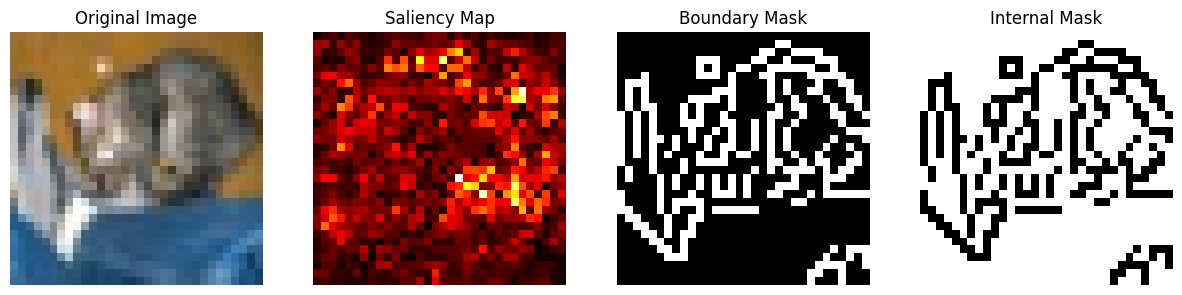

Label: 3, Class: cat


In [ ]:
def visualize(image, saliency, boundary_mask, internal_mask):
    fig, ax = plt.subplots(1, 4, figsize=(15, 5))

    ax[0].imshow(image)
    ax[0].set_title('Original Image')

    ax[1].imshow(saliency, cmap='hot')
    ax[1].set_title('Saliency Map')

    ax[2].imshow(boundary_mask, cmap='gray')
    ax[2].set_title('Boundary Mask')

    ax[3].imshow(internal_mask, cmap='gray')
    ax[3].set_title('Internal Mask')

    for a in ax:
        a.axis('off')

    plt.show()

# Fetch and visualize the first image
images, labels = next(iter(testloader))
image = images[0].permute(1, 2, 0).numpy()  # Convert to HxWxC format
saliency = generate_saliency_map(model, images, labels[0].item())
boundary_mask, internal_mask = get_boundary_mask(image)

# Visualize saliency, boundary, and internal masks
visualize(image, saliency, boundary_mask, internal_mask)

# Print the class label of the image
print(f"Label: {labels[0].item()}, Class: {classes[labels[0].item()]}")

# Interpretation of Results:
## Statistical Results
The t-test comparing the saliency between boundary and internal pixels yielded a T-statistic of -27.649 and a P-value of 0.000.

- T-statistic (-27.649): The large negative value indicates that the average saliency for internal pixels is significantly greater than the saliency for boundary pixels. This strong difference is likely to be meaningful given the magnitude of the statistic.
- P-value (0.000): The P-value is extremely small, effectively zero. This means the observed difference is statistically significant, and we can reject the null hypothesis with a high degree of confidence.

## Image results:
The images of the cat in the last plot reveal that the saliency map highlights the internal features, such as the face or body of the cat, as being more important to the model’s prediction than the edges or boundaries. The boundary mask shows the cat’s outline, while the internal mask covers areas within the outline. Given the results (T-statistic: -27.649, P-value: 0.000), the plot visually supports the conclusion that the model places significantly more emphasis on the internal parts of the cat, such as its face, rather than the edges or contours.

## Conclusion:
The experiment suggests that internal pixels of the images tend to have higher importance (saliency) compared to boundary pixels, as per the deep learning model's saliency map. This finding aligns with the hypothesis that the model focuses more on the internal features of objects rather than their edges or boundaries when making predictions.